# Credit-Risk Modelling
<br>
data source: https://www.kaggle.com/c/home-credit-default-risk/

## Business Understanding

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math
import statistics

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

pd.options.display.max_rows = 1000

## Checking files that will be used

In [2]:
file_list = os.listdir('.')
print('The files that will be used are:' '\n')
for file in file_list:
    if 'application' in file:
        print(file)

The files that will be used are:

application_test.csv
application_train.csv
previous_application.csv


All file's content has been explained in the previous section, so lets continue to see the greater details!

## Reading the train data

In [3]:
train_data = pd.read_csv('application_train.csv',index_col='SK_ID_CURR')
print('The size of train_data is:',train_data.shape)

The size of train_data is: (307511, 121)


## Information about the data

In [4]:
# Checking data
display(train_data.head().T)

SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5
AMT_GOODS_PRICE,351000,1.1295e+06,135000,297000,513000


In [5]:
#Basic statistics of data
display(train_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


In [6]:
#Data types
train_data.dtypes

TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [7]:
#Checking name of columns
list(train_data)

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [8]:
#Checking vull values in data and its proportion to each column
def missing_values_table(df):
    missing_value = df.isnull().sum()
    missing_value_percentage = 100 * df.isnull().sum() / len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percentage], axis=1)
    missing_value_table = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values',ascending=False).round(1)
    return missing_value_table

missing_values_table(train_data)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Exploratory Data Analysis

### Default & Non-default Clients Distribution

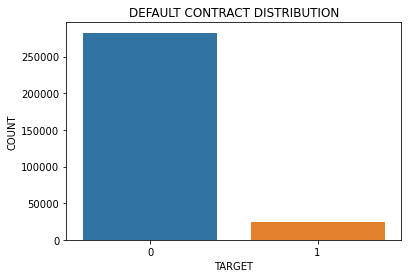

In [9]:
sns.countplot(x='TARGET', data=train_data)

plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.title('DEFAULT CONTRACT DISTRIBUTION')
plt.show()

### Client's Age Distribution

<AxesSubplot:xlabel='AGE', ylabel='Density'>

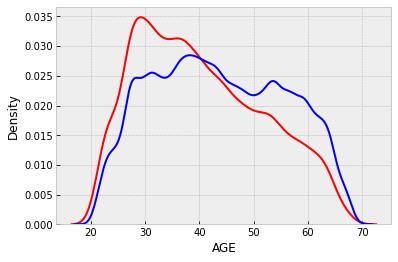

In [10]:
#For more intuitive sight, lets translate DAYS_BIRTH to AGE
train_data['AGE'] = train_data['DAYS_BIRTH'].apply(lambda x: math.floor(x/-365))

#Plotting distribution of Age who Defaulted
plt.style.use('bmh')
sns.kdeplot(train_data[train_data['TARGET'] == 1]['AGE'],color='red')
sns.kdeplot(train_data[train_data['TARGET'] == 0]['AGE'],color='blue')

### Contract Type Percentage

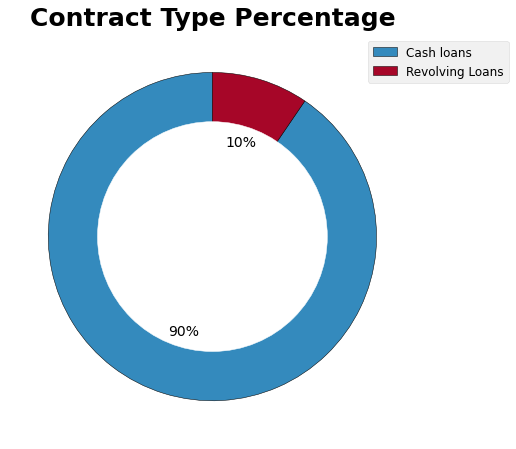

In [11]:
fig, ax = plt.subplots()

size = 0.3
vals = train_data['NAME_CONTRACT_TYPE'].value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
cmap = plt.get_cmap("tab20c")
labels = ['Cash loans','Revolving Loans']

ax.pie(vals, radius=1, startangle=90, wedgeprops={'edgecolor': 'black'}, 
       textprops={'fontsize': 14}, autopct='%1.f%%')
plt.gcf().gca().add_artist(my_circle)

fig.set_figheight(8)
fig.set_figwidth(6)
fig.legend(labels=labels, fontsize='large',loc='upper right',bbox_to_anchor=(0.5, 0.35, 0.7, 0.5))
fig.tight_layout()
fig.suptitle('Contract Type Percentage', fontsize=25, y=0.9, fontweight='bold', x=0.5)

fig.savefig('./output-files/graphs-and-charts/contract-type.png')
plt.show()

### Client's Contact Provided

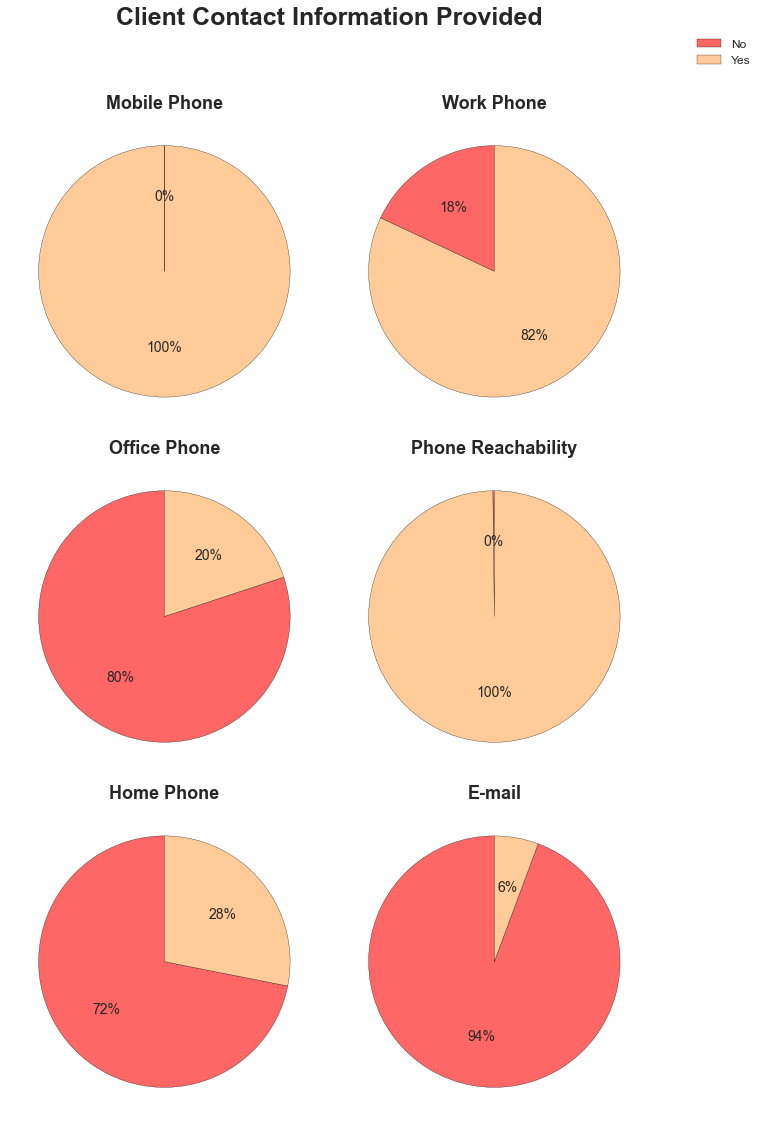

In [12]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
count_value = pd.DataFrame(columns=cols_list,index=[0,1])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=3, ncols=2)

labels = 'No', 'Yes'
colors = ['#ff6666', '#ffcc99']

plt.title('Client Contact Information')
plt.tight_layout()

#Plotting pie chart for every data kind
chart_title = ['Mobile Phone','Work Phone','Office Phone','Phone Reachability','Home Phone','E-mail']

for i in range(0,3):
    for j in range(0,2):
        ax[i,j].pie(count_value.iloc[2*i+j], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, 
                    textprops={'fontsize': 14}, autopct='%1.f%%')
        ax[i,j].set_title(chart_title[2*i+j], fontweight='bold',fontsize= 18)

fig.suptitle('Client Contact Information Provided', fontsize=25, y=1.04, fontweight='bold', x=0.5)
fig.set_figheight(15)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc='upper right',bbox_to_anchor=(0.5, 0.52, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-contact-information-provided.png')

plt.show()

## Client Registered Address

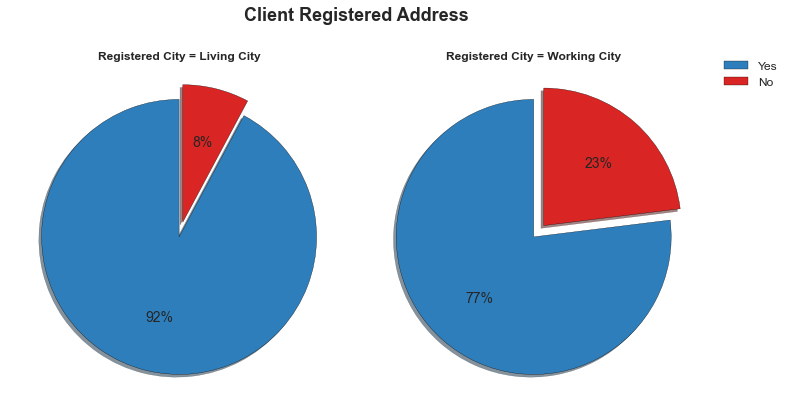

In [13]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']
count_value = pd.DataFrame(columns=cols_list,index=[0,1])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=1, ncols=2)
a,b = [plt.cm.Blues,plt.cm.Reds]
labels = 'Yes', 'No'

#Plotting pie chart for every data kind
chart_title = ['Registered City = Living City','Registered City = Working City']
explode = (0,0.11)

for i in range(0,2):
    ax[i].pie(count_value.iloc[i], explode = explode, startangle=90, shadow= True, 
              colors=[a(0.7),b(0.7)], wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',textprops={'fontsize': 14})
    ax[i].set_title(chart_title[i], fontweight='bold')
    
fig.suptitle('Client Registered Address', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-registered-address.png')

plt.show()

### Client's Wealth

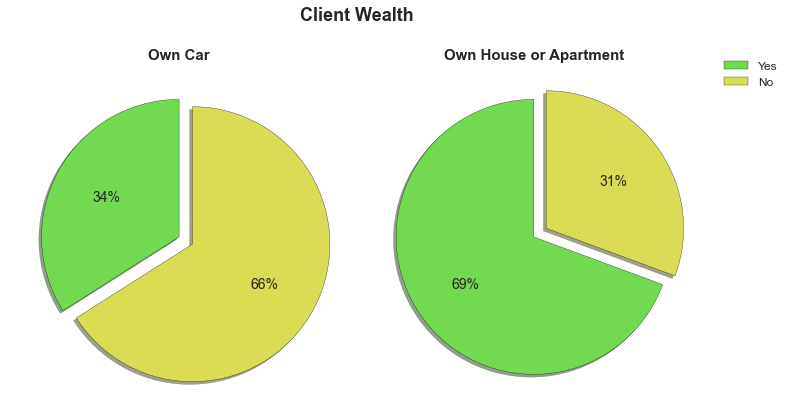

In [14]:
plt.style.use('seaborn')

#Building dataframe consist of customers data provided
cols_list = ['FLAG_OWN_CAR','FLAG_OWN_REALTY']
count_value = pd.DataFrame(columns=cols_list,index=['Y','N'])

for col in cols_list:
    count_value[col]= train_data[col].value_counts().to_frame()
count_value = count_value.T

fig, ax = plt.subplots(nrows=1, ncols=2)
colors = ['#72DA51','#DADC53']
labels = 'Yes', 'No'

#Plotting pie chart for every data kind
chart_title = ['Own Car','Own House or Apartment']
explode = (0,0.11)

for i in range(0,2):
    ax[i].pie(count_value.iloc[i], explode = explode, startangle=90, shadow= True, colors=colors,
              wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',textprops={'fontsize': 14})
    ax[i].set_title(chart_title[i], fontweight='bold',fontsize=15)
    
fig.suptitle('Client Wealth', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.legend(labels=labels, fontsize='large',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/client-wealth.png')

plt.show()

### Loan Specification

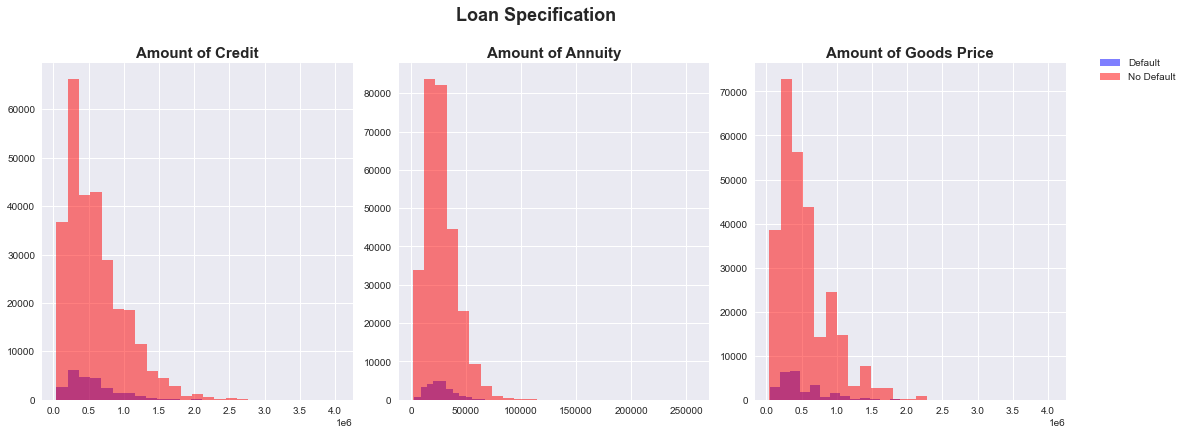

In [15]:
plt.style.use('seaborn')

#Column to plot
cols_list = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

fig, ax = plt.subplots(nrows=1, ncols=3)

chart_title = ['Amount of Credit','Amount of Annuity', 'Amount of Goods Price']
labels = ['Default','No Default']

for i in range(0,3):
    ax[i].hist(train_data[train_data['TARGET'] == 1][cols_list[i]],bins=25,color='b',alpha=0.5)
    ax[i].hist(train_data[train_data['TARGET'] == 0][cols_list[i]],bins=25,color='r',alpha=0.5)
    ax[i].set_title(chart_title[i], fontweight='bold',fontsize=15)
    
fig.suptitle('Loan Specification', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(6)
fig.set_figwidth(15)
fig.tight_layout()
fig.legend(labels=labels,fontsize='medium',loc=1,bbox_to_anchor=(0.5, 0.4, 0.6, 0.5))

fig.savefig('./output-files/graphs-and-charts/loan-specification.png')

plt.show()

### Conclusion on EDA

From the EDA I have done I drew some conclution:<br>
1. Target class is highly imbalance<br>
2. There is a trend where the client's age increasing, the probability of client defaulted decreasing<br>
3. Most of the loans are cash loans<br>
4. Almost all clients provide mobile phone and the phone numbers are reachable.<br>
5. Clients registered address are mostly in the same city where they live, but not where their work<br>
6. Two-third of clients don't have their own car, but two-third of them have their own home<br>
7. Loan specification such as amount loan total, amount annuity, etc does'nt show any trend which refer to the defaulted contracts

## Data Preparation

### Encoding Categorical Feature

In [16]:
# Calling Ordinal Encoder from sklearn
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [17]:
# Creating a list which contain category columns
category_cols = [col for col in list(train_data) if train_data[col].dtype == 'object']

# Creating new dataframe with columns = category_cols
df = pd.DataFrame(columns=category_cols)

# Loop to each col in category_cols 
for col in category_cols:
    df[col] = train_data[col]
    t = np.array(df[df[col].notna()==True][col])
    impute_reshape = t.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    df.loc[df[df[col].notnull()==True].index,col] = np.squeeze(impute_ordinal)

# Merging train_data with df with category columns on train_data dropped first. Index resetted for merging dataframes
train_data = train_data.drop(labels = category_cols,axis=1).reset_index()
df = df.reset_index()

# Merge df with train_data
train_data = pd.merge(train_data, df, on='SK_ID_CURR')
train_data.set_index('SK_ID_CURR',inplace=True)

### Anomaly Detection and How We Deal with It

All **continuous columns** has been **scaled**, so we will assume no anomaly in the columns. Next let's check on discrete columns

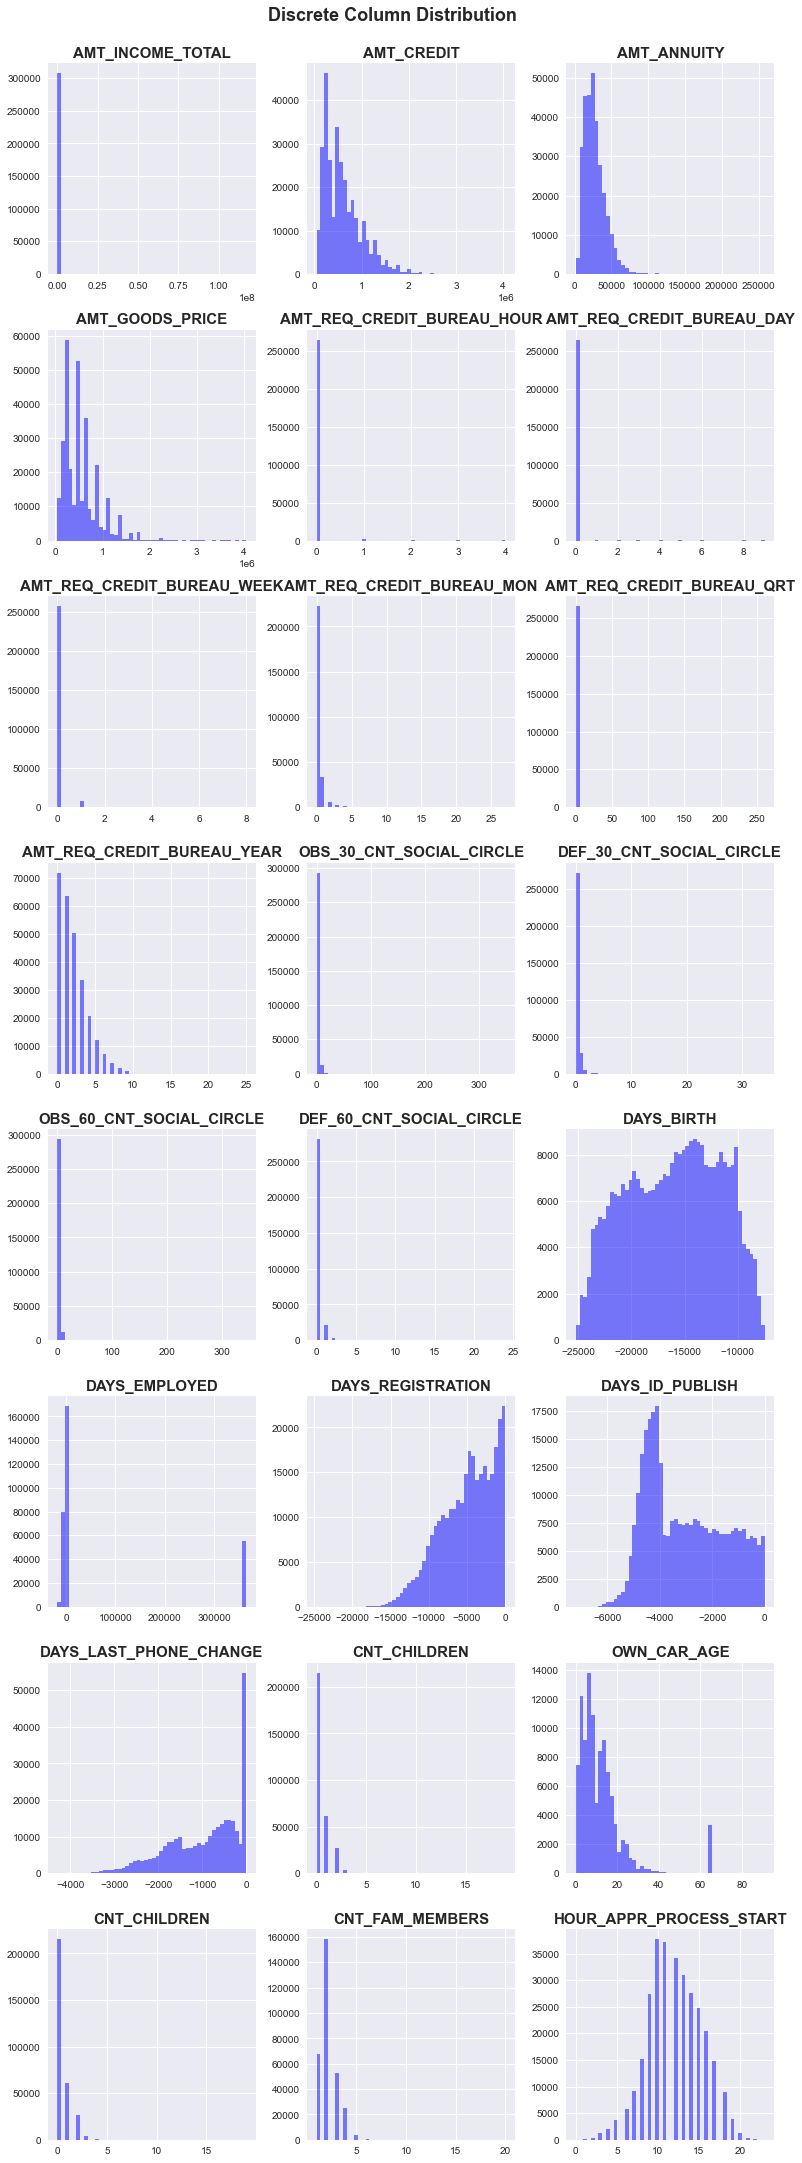

In [18]:
# List all columns that consist of discrete numbers 
flag_columns = [col for col in list(train_data) if 'FLAG_' in col]
reg_columns = [col for col in list(train_data) if '_REGION' in col]
city_columns = [col for col in list(train_data) if '_CITY' in col]
amt_columns = [col for col in list(train_data) if 'AMT_' in col]
reg_rating_columns = [col for col in list(train_data) if 'REGION_RATING' in col]
soc_circle_columns = [col for col in list(train_data) if 'SOCIAL_CIRCLE' in col]
days_columns = [col for col in list(train_data) if 'DAYS_' in col]
other_disc_columns = ['CNT_CHILDREN','OWN_CAR_AGE','CNT_CHILDREN','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START']
all_discrete_columns = category_cols + flag_columns + reg_columns + city_columns + amt_columns + reg_rating_columns + soc_circle_columns + days_columns + other_disc_columns

#Plotting distribution of cnt columns
plt.style.use('seaborn')

#Column to plot (except flag-type columns and rating columns)
cols_list = amt_columns+soc_circle_columns+days_columns+other_disc_columns

fig, ax = plt.subplots(nrows=8, ncols=3)

for i in range(0,8):
    for j in range(0,3):
        ax[i,j].hist(train_data[cols_list[3*i+j]],bins=50,color='b',alpha=0.5)
        ax[i,j].set_title(cols_list[3*i+j], fontweight='bold',fontsize=15)
    
fig.suptitle('Discrete Column Distribution', fontsize=18, y=1, fontweight='bold', x=0.5)
fig.set_figheight(30)
fig.set_figwidth(11)
fig.tight_layout()

fig.savefig('./output-files/graphs-and-charts/discrete-columns-distribution.png')

plt.show()

Anomaly spotted in AMT_INCOME_TOTAL and DAYS_EMPLOYED. How to deal with these anomalies is the data will be filled by nan and together all nan data  will be imputed in the next step

In [19]:
# Drop data for AMT_INCOME_TOTAL > 100000000
train_data['AMT_INCOME_TOTAL'] = train_data['AMT_INCOME_TOTAL'].apply(lambda x: np.nan if x > 100000000 else x)

# Drop data for DAYS_EMPLOYED > 0
train_data['DAYS_EMPLOYED'] = train_data['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)

### Data Imputation 

In [20]:
# Importing Iterative Imputer Library
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [21]:
# Defining imputation by MICE method function
def impute_MICE(df):
    df_columns = df.columns
    imp_mean = IterativeImputer(initial_strategy = "mean", n_nearest_features = 15, random_state = 0, imputation_order="ascending")
    x = imp_mean.fit(df)
    X = df
    df_MICE_imputed = pd.DataFrame(imp_mean.transform(X),index=df.index)
    df_MICE_imputed.columns = df_columns
    return df_MICE_imputed

In [23]:
# Change data type to float for imputation preparation
for col in list(train_data):
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].astype(float)

# Exclude 'TARGET' from train_data to prevent data leakage
imputation_data = train_data.drop('TARGET',axis=1)

# Imputing train data, (mice function only accept np.array data) and format it to dataframe
imputing_train = impute_MICE(imputation_data)
imputed_train = pd.DataFrame(imputing_train, columns=imputation_data.columns)

In [24]:
# Checking if there is still any missing values in imputed data
missing_values_table(imputed_train)

#The result must be empty after imputation process

,Missing Values,% of Total Values


In [25]:
# Rounding numbers in columns that are discrete
imputed_train[all_discrete_columns] = np.round(imputed_train[all_discrete_columns])

In [26]:
# Concat with TARGET to get final imputed_train
final_imputed_train = pd.merge(left=imputed_train.reset_index(), right=train_data['TARGET'].reset_index(), on='SK_ID_CURR')
final_imputed_train = final_imputed_train.set_index('SK_ID_CURR')

# Saving final_imputed_train
final_imputed_train.to_csv('./output-files/final_imputed_train.csv')

In [29]:
# Read final_imputed_train file
final_imputed_train = pd.read_csv('./output-files/final_imputed_train.csv',index_col='SK_ID_CURR')
display(final_imputed_train.head())

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0,202500.0,406598.0,24700.0,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,...,3.0,1.0,8.0,6.0,5.0,2.0,0.0,5.0,0.0,1
100003,0.0,270000.0,1293502.0,35698.0,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,...,1.0,1.0,3.0,1.0,39.0,2.0,0.0,0.0,0.0,0
100004,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,...,3.0,1.0,8.0,1.0,11.0,2.0,0.0,4.0,0.0,0
100006,0.0,135000.0,312682.0,29686.0,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,...,0.0,1.0,8.0,6.0,5.0,2.0,0.0,4.0,0.0,0
100007,0.0,121500.0,513000.0,21866.0,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,...,3.0,1.0,3.0,4.0,37.0,2.0,0.0,4.0,0.0,0


### Balancing Classes Using SMOTE

In [30]:
# Import libraries needed
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression

In [31]:
# Define dataset
X = final_imputed_train.drop('TARGET',axis=1)
y = final_imputed_train['TARGET']

In [32]:
# Searching optimum k_neighbors for oversample minority data using RepeatedStratifiedKfold
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = LogisticRegression()
    over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5,random_state=101)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.634
> k=2, Mean ROC AUC: 0.634
> k=3, Mean ROC AUC: 0.634
> k=4, Mean ROC AUC: 0.634
> k=5, Mean ROC AUC: 0.634
> k=6, Mean ROC AUC: 0.634
> k=7, Mean ROC AUC: 0.634


In [33]:
# Transforming dataset with optimum parameters (k_neighbors, oversample strategy, undersample strategy) obtained
over = SMOTE(sampling_strategy=0.1, k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=101)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

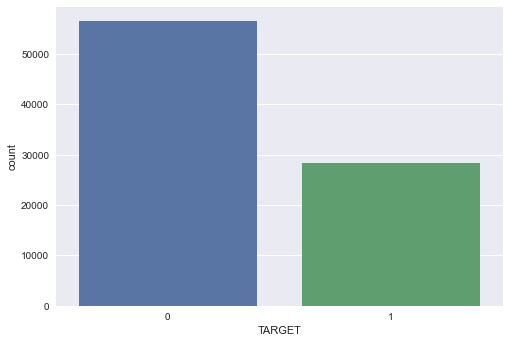

In [34]:
# Checking target class proportion after rebalancing
sns.countplot(x=y)

Now the data target class seems more balanced!

### Regularization (Lasso Regression)

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [36]:
# Declare X and y for regularization process
X = final_imputed_train.drop('TARGET',axis=1)
y = final_imputed_train['TARGET']
clf = Lasso(alpha=0.005,max_iter=10000)
scaler = StandardScaler()
clf.fit(scaler.fit_transform(X), y)

# Create a list of final_features that will be used
final_features = []
for i in range(len(list(X))):
    if clf.coef_[i]:
        final_features.append(list(X)[i])

print('There are',len(final_features),'features that will be used, they are: ', final_features)

There are 12  features that will be used, they are:  ['DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_EDUCATION_TYPE']


In [37]:
# Create dataframe consist of features and their importances
feature_importance = pd.DataFrame(data = np.abs(clf.coef_),index=list(X),columns=['Importance'])
feature_importance = feature_importance[feature_importance['Importance'] != 0].sort_values(by='Importance',ascending=False)
feature_importance.to_csv('./output-files/feature-importance.csv')
feature_importance.head()

,Importance
EXT_SOURCE_3,0.032289
EXT_SOURCE_2,0.029426
EXT_SOURCE_1,0.015338
NAME_EDUCATION_TYPE,0.006939
CODE_GENDER,0.005470


### Multicollinearity Issue

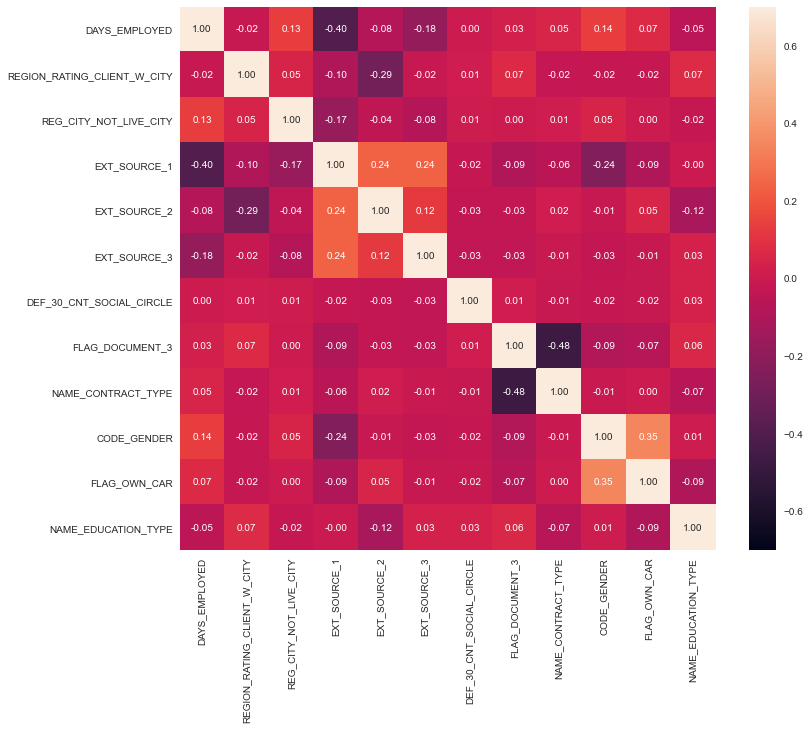

In [38]:
# Correlation map
plt.figure(figsize=(12,10))
sns.heatmap(X[final_features].corr(),annot=True,fmt='.2f',vmin=-0.7,vmax=0.7)
plt.savefig('./output-files/graphs-and-charts/final-feature-correlation.png')

Seems that no features highly correlated each other!

### Creating final dataframe which will be used in building model

In [39]:
# Updating train data set with only final features and save it to csv
final_train = pd.concat([X[final_features],y],axis=1)
final_train.to_csv('./output-files/final_train.csv')

In [40]:
# Reading final_train dataset that will be used in modelling
final_train = pd.read_csv('./output-files/final_train.csv')
display(final_train.head())

,SK_ID_CURR,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,TARGET
0,100002,-637.0,2.0,0.0,0.083037,0.262949,0.139376,2.0,1.0,0.0,1.0,0.0,4.0,1
1,100003,-1188.0,1.0,0.0,0.311267,0.622246,0.494749,0.0,1.0,0.0,0.0,0.0,1.0,0
2,100004,-225.0,2.0,0.0,0.612595,0.555912,0.729567,0.0,0.0,1.0,1.0,1.0,4.0,0
3,100006,-3039.0,2.0,0.0,0.639526,0.650442,0.540054,0.0,1.0,0.0,0.0,0.0,4.0,0
4,100007,-3038.0,2.0,0.0,0.602391,0.322738,0.532649,0.0,0.0,0.0,1.0,0.0,4.0,0


## Data Modelling

### Train-test Split Data

In [41]:
# Splitting the data to train and test set
X = final_train[final_features]
y = final_train['TARGET']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape,'\n'
      'X_test shape:', X_test.shape,'\n'
      'y_train shape:', y_train.shape,'\n'
      'y_test shape:', y_test.shape)

X_train shape: (215257, 12) 
X_test shape: (92254, 12) 
y_train shape: (215257,) 
y_test shape: (92254,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Calling logistic regression model
log_reg = LogisticRegression(max_iter = 1000)
# Fitting the model to X_train and y_train
log_reg.fit(scaler.fit_transform(X_train),y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

The model will be evaluated using AUC metrics which will gives the AUC score and Gini score. The model also used to the train and dataset to check whether the model overfit train data or not

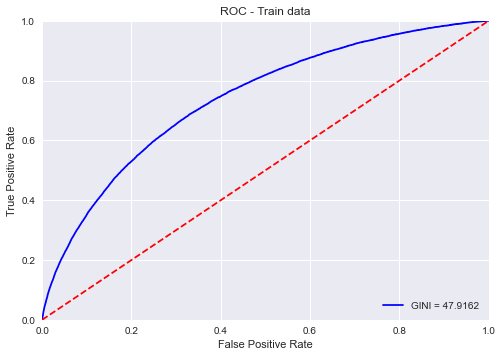

Gini = 47.9162
AUC = 0.7395810173944259


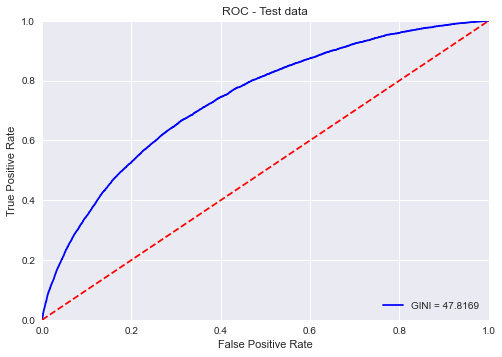

Gini = 47.8169
AUC = 0.7390845026042183


In [43]:
# Draw ROC curve for model predicting train data
roc_auc = roc_auc_score(y_train, log_reg.predict_proba(scaler.fit_transform(X_train))[:,1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg.predict_proba(scaler.fit_transform(X_train))[:,1])

plt.figure()
gini = 2*(roc_auc-0.5)*100
plt.plot(fpr, tpr,'b', label='GINI = %0.4f' % gini)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train data')
plt.legend(loc="lower right")
plt.savefig('./output-files/graphs-and-charts/ROC_TRAIN.png')
plt.grid('whitegrid')
plt.show() 

print('Gini = %0.4f'% gini)
print('AUC =',roc_auc)


# Draw ROC curve for model predicting test data
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(scaler.fit_transform(X_test))[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(scaler.fit_transform(X_test))[:,1])

plt.figure()
gini = 2*(roc_auc-0.5)*100
plt.plot(fpr, tpr,'b', label='GINI = %0.4f' % gini)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test data')
plt.legend(loc="lower right")
plt.savefig('./output-files/graphs-and-charts/ROC_TEST.png')
plt.grid('whitegrid')
plt.show() 

print('Gini = %0.4f'% gini)
print('AUC =',roc_auc)

The model seems not overfitting and predictive! Lets get to Deployment Step

## Deployment

In this step I will deploy the model to predict the data that is from another csv, application_test.csv. I will call it oot (out of time) data

In [45]:
oot_data = pd.read_csv('application_test.csv',index_col='SK_ID_CURR')
oot_data.head().T

SK_ID_CURR,100001,100005,100013,100028,100038
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,M,F,M
FLAG_OWN_CAR,N,N,Y,N,Y
FLAG_OWN_REALTY,Y,Y,Y,Y,N
CNT_CHILDREN,0,0,0,2,1
AMT_INCOME_TOTAL,135000,99000,202500,315000,180000
AMT_CREDIT,568800,222768,663264,1.575e+06,625500
AMT_ANNUITY,20560.5,17370,69777,49018.5,32067
AMT_GOODS_PRICE,450000,180000,630000,1.575e+06,625500
NAME_TYPE_SUITE,Unaccompanied,Unaccompanied,NaN,Unaccompanied,Unaccompanied


### Encoding oot data

In [47]:
# Create a for loop to iterate through each column in the data
# Creating a list which contain category columns
category_cols = [col for col in list(oot_data) if oot_data[col].dtype == 'object']

# Creating new dataframe with columns = category_cols
df = pd.DataFrame(columns=category_cols)

# Loop to each col in category_cols 
for col in category_cols:
    df[col] = oot_data[col]
    t = np.array(df[df[col].notna()==True][col])
    impute_reshape = t.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    df.loc[df[df[col].notnull()==True].index,col] = np.squeeze(impute_ordinal)

# Merging train_data with df with category columns on train_data dropped first. Index resetted for merging dataframes
oot_data = oot_data.drop(labels = category_cols,axis=1).reset_index()
df = df.reset_index()

# Merge df with train_data
oot_data = pd.merge(oot_data, df, on='SK_ID_CURR')
oot_data.set_index('SK_ID_CURR',inplace=True)

### Imputing oot data

In [48]:
# Change data type to float for imputation preparation
for col in list(oot_data):
    if oot_data[col].dtype == 'object':
        oot_data[col] = oot_data[col].astype(float)
        
# Imputing oot data, (mice function only accept np.array data) and format it to dataframe
imputing_oot = impute_MICE(oot_data)
imputed_oot = pd.DataFrame(imputing_oot, columns=oot_data.columns)

# Rounding numbers in columns that are discrete
imputed_oot[all_discrete_columns] = np.round(imputed_oot[all_discrete_columns])

final_imputed_oot = imputed_oot

### Predict the result using model 

In [49]:
# Change oot_data features to only final_features
X = final_imputed_oot[final_features]

# Predict the probability of application will be default using the model 
prediction = log_reg.predict_proba(scaler.fit_transform(X))

# Construct the dataframe consisted of prediction
oot_prediction = pd.DataFrame(prediction[:,1], index=X.index, columns=['Prediction'])
oot_prediction

,Prediction
SK_ID_CURR,
100001,0.047661
100005,0.145184
100013,0.017002
100028,0.046748
100038,0.123344
...,...
456221,0.029584
456222,0.057996
456223,0.053239


## Reference

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<br>
https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499 <br>
https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8 <br>
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 <br>
https://towardsdatascience.com/how-to-calibrate-undersampled-model-scores-8f3319c1ea5b <br>
https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2 <br>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ <br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/ <br>
Buuren, Oudshoorn.2011.mice: Multivariate Imputation by Chained Equations in R.*Jurnal of Statistical Software*.45(3) <br>
